# How to Choose the Number of Clusters

Using the same code as in the previous exercise, find the WCSS for clustering solutions with 1 to 10 clusters (you can try with more if you wish).

Find the most suitable solutions, run them and compare the results.

## Import the relevant libraries

In [62]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn
import warnings
from sklearn.cluster import KMeans
warnings.filterwarnings('ignore')
seaborn.set()

## Load the data

Load data from the csv file: <i> 'Countries_exercise.csv'</i>.

In [63]:
data = pd.read_csv('Countries-exercise.csv')
data

,name,Longitude,Latitude
0,Aruba,-69.982677,12.520880
1,Afghanistan,66.004734,33.835231
2,Angola,17.537368,-12.293361
3,Anguilla,-63.064989,18.223959
4,Albania,20.049834,41.142450
...,...,...,...
236,Samoa,-172.164851,-13.753243
237,Yemen,47.586762,15.909280
238,South Africa,25.083901,-29.000341
239,Zambia,27.774759,-13.458242


Remove the duplicate index column from the dataset. 

Plot the <i>'Longtitude'</i> and <i>'Latitude'</i> columns. 

## Plot the data

Plot the <i>'Longtitude'</i> and <i>'Latitude'</i> columns. 

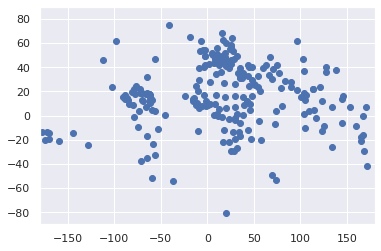

In [64]:
plt.scatter(data['Longitude'],data['Latitude'])
plt.xlim(-180,180)
plt.ylim(-90,90)
plt.show()

## Select the features

Make sure to select the appropriate features since we are no longer using the categorical variable for our clustering but rather <i>'Longitude'</i> and <i>'Laditude'</i>.

In [65]:
x = data[['Longitude','Latitude']]

## Clustering

Use 4 clusters initially.

In [66]:
kmeans_4 = KMeans(4)
clusters = kmeans_4.fit(x)

### Clustering results

In [67]:
clusters_results = kmeans_4.fit_predict(x)

In [68]:
df_with_clusters = data.copy()
df_with_clusters['Cluster'] = clusters_results

Plot the data once again but separate the data by the clusters we defined.  

## Plot the data

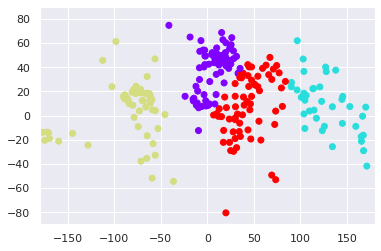

In [69]:
plt.scatter(df_with_clusters['Longitude'],df_with_clusters['Latitude'],c=df_with_clusters['Cluster'],cmap='rainbow')
plt.xlim(-180,180)
plt.ylim(-90,90)
plt.show()

## Selecting the number of clusters

### WCSS

Use the ingerated <i>sklearn</i> method <i> 'inertia_' </i>.

In [70]:
wcss_4 = kmeans_4.inertia_
wcss_4

256573.086759343

Write a loop that calculates and saves the WCSS for any number of clusters from 1 up to 10 (or more if you wish).

In [71]:
wcss=[]
for i in range (1,7):
    kmean = KMeans(i)
    kmean.fit(x)
    wcss.append(kmean.inertia_)


In [72]:
wcss

[1413859.6798344275,
 657012.0797586325,
 325235.522370559,
 256590.585754061,
 192356.48001889366,
 152164.1522106638]

### The Elbow Method

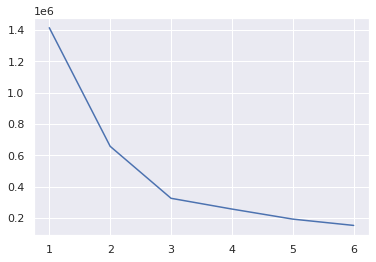

In [73]:
no_clusters = range(1,7)
plt.plot(no_clusters,wcss)

Here we use 4 clusters cozz after that the elbow graph becomes stable 